<a href="https://colab.research.google.com/github/Chieh-YuHung-hub/HTM737/blob/main/Week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
'''
The charts we generated today are:
1.	Bar chart: The top 10 owners own with the most dialysis centers, ranked in ascending order by number of centers owned.
2.	Boxplot: The Performance Score Distribution for the top 10 owners
3.	Bar chart: The Average Total Performance Score of centers with the standard errors
4.	Correlation Heatmap: Showing relationships among key performance measures
  (Total Performance Score, VAT Catheter Measure Score, ICH CAHPS Measure Score, Vascular Access Combined Measure Score)

These visualizations provide an intuitive way for stakeholders to make decisions more efficiently, as they can get information quickly from those figures.
From the figures, policymakers can use these figures to identify the need for incentives or penalties to drive higher performance.
The figures allow dialysis managers to benchmark their scores against peers and then improve the scores by working on highly correlated scores.
In addition, they can also check if any branch of their dialysis centers is far from the group mean, so that they can make new rules to improve their branches.
Investors can assess which companies are more capable of recouping their investment costs, maintaining stability, and demonstrating potential for growth.
'''

'\nThe charts we generated today are: \n1.\tBar chart: The top 10 owners own with the most dialysis centers, ranked in ascending order by number of centers owned.\n2.\tBoxplot: The Performance Score Distribution for the top 10 owners\n3.\tBar chart: The Average Total Performance Score of centers with the standard errors\n4.\tCorrelation Heatmap: Showing relationships among key performance measures \n  (Total Performance Score, VAT Catheter Measure Score, ICH CAHPS Measure Score, Vascular Access Combined Measure Score)\n\nThese visualizations provide an intuitive way for stakeholders to make decisions more efficiently, as they can get information quickly from those figures.\nFrom the figures, policymakers can use these figures to identify the need for incentives or penalties to drive higher performance.\nThe figures allow dialysis managers to benchmark their scores against peers and then improve the scores by working on highly correlated scores.\nIn addition, they can also check if any 

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib: A library in Python to visualize data
#pyplot: A submodule of matplotlib for plotting charts

In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/osoliman/Chapter6_HTM737/refs/heads/main/ESRD.csv')

In [62]:
#Q1: visualizing top 10 owners
'''
From last time, we knew that we need to remove rows with total performance score = 'No score'
and also to convert the Total Performance Score to integer
'''

df_filt = df[df['Total Performance Score'] != 'No Score'].copy()
#Filter the data from dataframe which are not 'No Score'in 'Total Performance Score', and then, copy it and name it as 'df_filt'
df_filt['Total Performance Score'] = df_filt['Total Performance Score'].astype(int)
#Transfer to integer type

In [66]:
#The question mentions ownership, let's search for what columns we should be using?
search_word = 'owner'
for column in df.columns:
    if search_word in column.lower():
        print(column)
#Using loop function to find any column includes 'owner'

Ownership as of December 31, 2016
Date of Ownership Record Update


In [65]:

#Let's rename the column to make it shorter and more meaningful
df_filt['Ownership'] = df_filt['Ownership as of December 31, 2016']

#Now we need to do group by ownership with counts and select top 10 owners

In [67]:
#old way which gives the same results
owner_counts = df_filt.groupby('Ownership').size().sort_values(ascending=False).head(10)

'''
Group by 'Ownership'
Using size to calculate
Sort values in descending order
Select top 10
'''


"\nGroup by 'Ownership'\nUsing size to calculate\nSort values in descending order\nSelect top 10\n"

In [68]:
owner_counts

,0
Ownership,
DAVITA,2384
FRESENIUS MEDICAL CARE,2285
NOT A CHAIN,754
"DIALYSIS CLINIC, INC.",230
AMERICAN RENAL ASSOCIATES,187
"US RENAL CARE, INC.",155
SATELLITE HEALTHCARE,60
DIVERSIFIED SPECIALTY INSTITUTES (DSI),52
OTHER,46


In [69]:
#new way that's shorter and gives the exact same results!!! how beautiful?
owner_counts = df_filt['Ownership'].value_counts().head(10)


#value_counts is a shortcut to groupby.size().sort_values(ascending = false)

In [70]:
owner_counts

,count
Ownership,
DAVITA,2384
FRESENIUS MEDICAL CARE,2285
NOT A CHAIN,754
"DIALYSIS CLINIC, INC.",230
AMERICAN RENAL ASSOCIATES,187
"US RENAL CARE, INC.",155
SATELLITE HEALTHCARE,60
DIVERSIFIED SPECIALTY INSTITUTES (DSI),52
OTHER,46


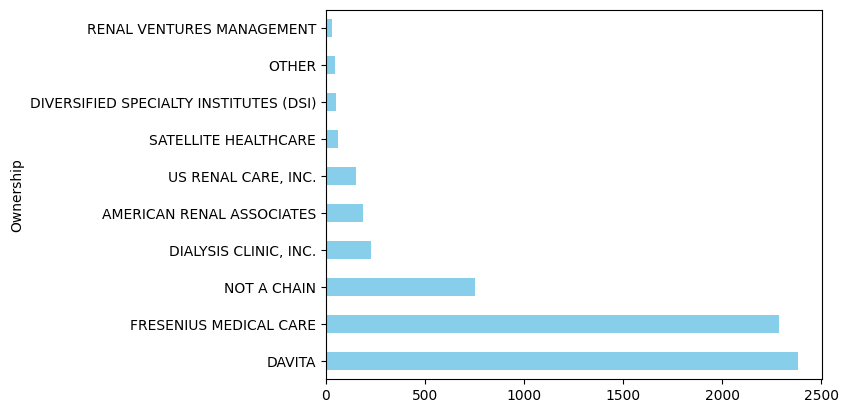

'\nTitle, X-axis title, units\nplt means the library "matplotlib"\nWe can also use the color code #87CEEB to replace the name of the color\nbar: bar chart\nbarh: horizontal bar chart\n'

In [71]:
#Now we want to convert the above table to a bar graph
owner_counts.plot(kind='barh', color='skyblue')
plt.show()
#plot.show() is similar to print(your_variable) in analogy
#What are we missing?

'''
Title, X-axis title, units
plt means the library "matplotlib"
We can also use the color code #87CEEB to replace the name of the color
bar: bar chart
barh: horizontal bar chart
'''

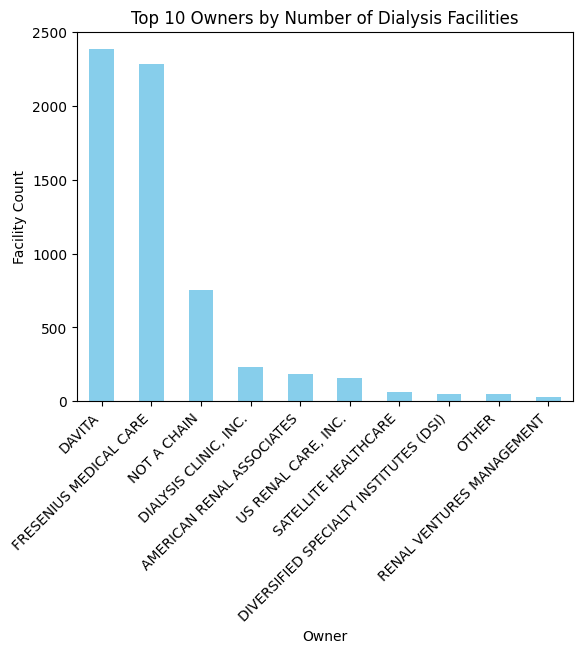

In [72]:
owner_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Owners by Number of Dialysis Facilities')
plt.xlabel('Owner')
plt.ylabel('Facility Count')
plt.xticks(rotation=45, ha='right') #ha = horizontal alignment
plt.show()

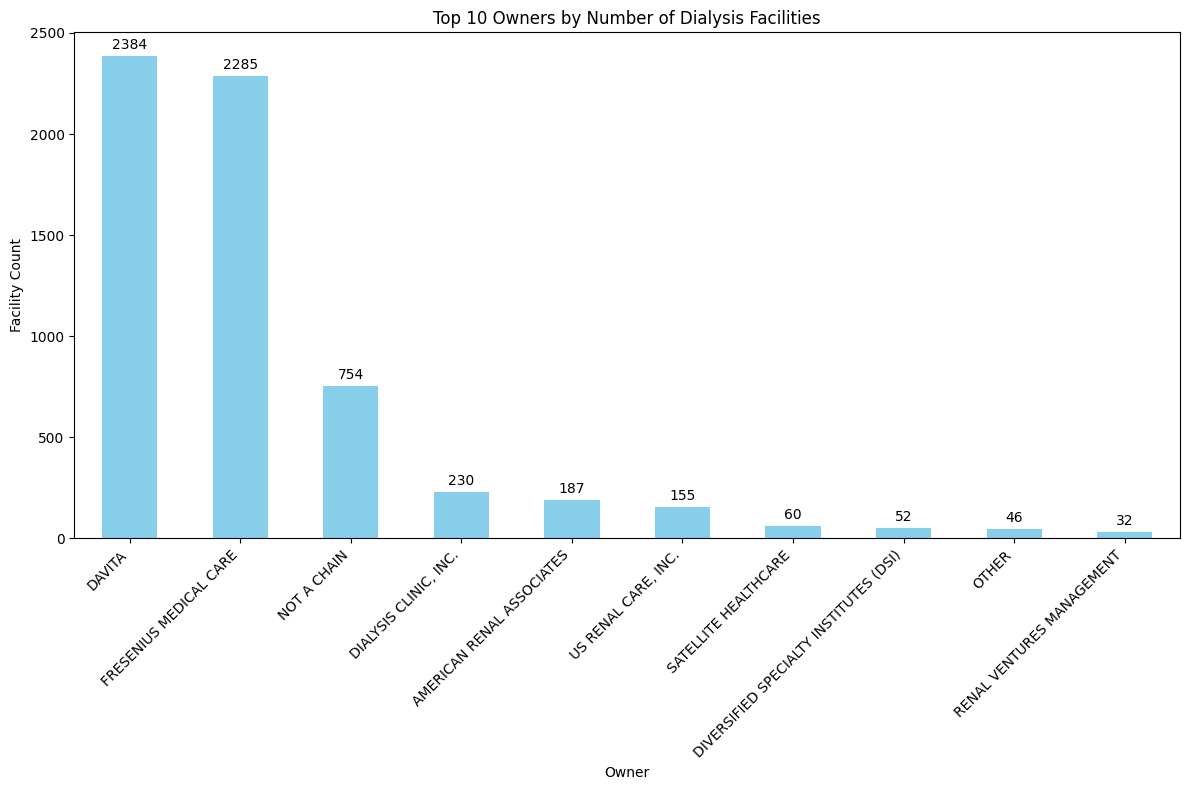

In [73]:
#sometimes, we want to assign the plot to an object to do further processing
plt.figure(figsize=(12, 8))
ax = owner_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Owners by Number of Dialysis Facilities')
plt.xlabel('Owner')
plt.ylabel('Facility Count')
plt.xticks(rotation=45, ha='right')

'''
figsize=(12, 8): width: 12 (inches), height: 8 (inches)
ha = horizontal alignment
'''

# Add data labels
ax.bar_label(ax.containers[0], labels=owner_counts.values, padding=3)
#what does "padding=3" do?
#a good practice to learn is to remove it and then see what happens?
#you can also change it
#let's try this in tight_layout()

'''
ax.containers[0]: The first group of bars
labels=owner_counts.values: The values that are shown on the bars
padding=3: The distance between the labels and the bars
'''

plt.tight_layout()
#Adjust the gaps among each element
plt.show()

In [74]:
#Q2: visualize the total performance score for the top 10 owners
#We need to get the data first, what shape?
owner_counts.head()


,count
Ownership,
DAVITA,2384
FRESENIUS MEDICAL CARE,2285
NOT A CHAIN,754
"DIALYSIS CLINIC, INC.",230
AMERICAN RENAL ASSOCIATES,187


In [75]:
df.head()

,Facility Name,CMS Certification Number (CCN),Alternate CCN 1,Address 1,Address 2,City,State,Zip Code,Network,VAT Catheter Measure Score,...,STrR Improvement Measure Rate/Ratio,STrR Improvement Period Numerator,STrR Improvement Period Denominator,STrR Measure Score Applied,National Avg STrR Measure Score,Total Performance Score,PY2018 Payment Reduction Percentage,CMS Certification Date,"Ownership as of December 31, 2016",Date of Ownership Record Update
0,CHILDRENS HOSPITAL DIALYSIS,12306,013300,1600 7TH AVENUE SOUTH,-,BIRMINGHAM,AL,35233,8,No Score,...,No Ratio,NaN,NaN,NaN,5,70,No Reduction,11/17/1982,NOT A CHAIN,3/6/2012
1,FMC CAPITOL CITY,12500,-,255 S JACKSON STREET,-,MONTGOMERY,AL,36104,8,5,...,0.943,20.0,21.203,Achievement,5,64,No Reduction,9/1/1976,FRESENIUS MEDICAL CARE,3/6/2012
2,GADSDEN DIALYSIS,12501,-,409 SOUTH FIRST STREET,-,GADSDEN,AL,35901,8,5,...,1.283,18.0,14.032,Achievement,5,49,No Reduction,9/1/1976,DAVITA,11/18/2009
3,TUSCALOOSA UNIVERSITY DIALYSIS,12502,-,220 15TH STREET,-,TUSCALOOSA,AL,35401,8,7,...,0.993,23.0,23.161,Achievement,5,54,No Reduction,10/21/1977,DAVITA,11/17/2009
4,PCD MONTGOMERY,12505,-,1001 FOREST AVENUE,-,MONTGOMERY,AL,36106,8,7,...,0.433,9.0,20.801,Achievement,5,71,No Reduction,12/14/1977,DAVITA,3/16/2012


In [76]:
#bringing the fields for only the top 10 using merge/join
df_top10 = pd.merge(df_filt, owner_counts, left_on='Ownership', right_index=True)
#Merges the Ownership column from the left DataFrame(df_filt) with the index of the right DataFrame(owner_counts)

<Figure size 1400x700 with 0 Axes>

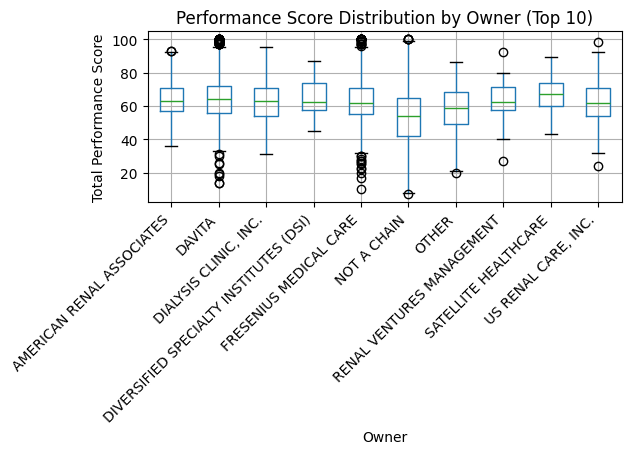

In [77]:
plt.figure(figsize=(14, 7)) #numbers here are in inches
df_top10.boxplot(column='Total Performance Score', by='Ownership')
plt.title('Performance Score Distribution by Owner (Top 10)')
plt.suptitle('')
plt.xlabel('Owner')
plt.ylabel('Total Performance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

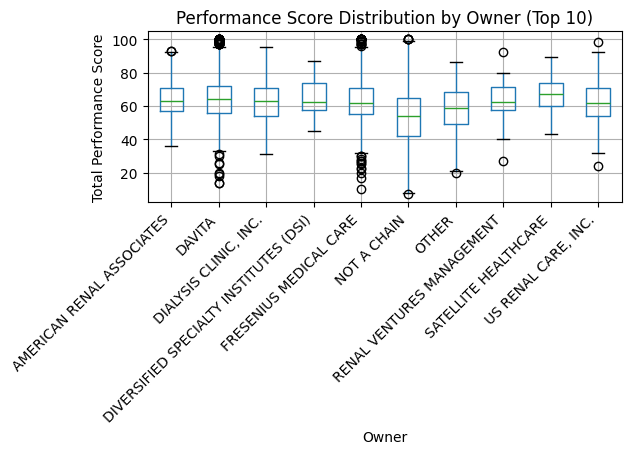

In [78]:
#a cleaner shortcut using "isin"
top10_owners = owner_counts.index
df_top10 = df_filt[df_filt['Ownership'].isin(top10_owners)]
#isin(top10_owners)]: checks whether each value exists in the list

plt.figure(figsize=(14, 7)) #numbers here are in inches
df_top10.boxplot(column='Total Performance Score', by='Ownership')
plt.title('Performance Score Distribution by Owner (Top 10)')
plt.suptitle('')
plt.xlabel('Owner')
plt.ylabel('Total Performance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [79]:
#Q3: visualize average for each of the top 10 centers
avg_scores = df_top10.groupby('Ownership')['Total Performance Score'].mean()

In [82]:
avg_scores

,Total Performance Score
Ownership,
AMERICAN RENAL ASSOCIATES,63.529412
DAVITA,63.911493
"DIALYSIS CLINIC, INC.",62.821739
DIVERSIFIED SPECIALTY INSTITUTES (DSI),64.865385
FRESENIUS MEDICAL CARE,62.894530
NOT A CHAIN,53.397878
OTHER,57.456522
RENAL VENTURES MANAGEMENT,62.406250
SATELLITE HEALTHCARE,66.816667


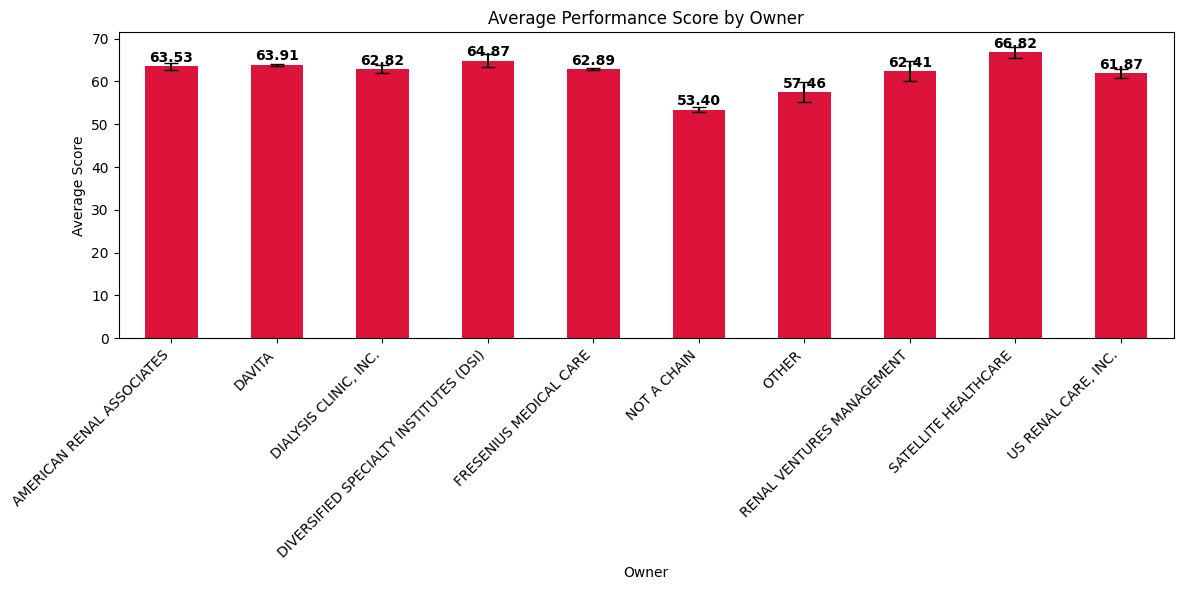

In [84]:
plt.figure(figsize=(12, 6))
ax = avg_scores.plot(kind='bar', color='crimson')
plt.title('Average Performance Score by Owner')
plt.xlabel('Owner')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
# Calculate standard error
std_err = df_top10.groupby('Ownership')['Total Performance Score'].sem()
plt.errorbar(x=avg_scores.index, y=avg_scores, yerr=std_err, fmt='none', capsize=5, color='black')
'''
sem(): Calculate the standard error of the mean
yerr=std_err: adds vertical error bars representing the standard error of the mean
fmt='none': does not show the data points
'''

# Add value labels
ax.bar_label(ax.containers[0], fmt='%.2f', padding=1, fontweight='bold')
#fmt='%.2f': Show the data with 2 digits after the decimal point

plt.tight_layout()
plt.show()

In [85]:
from collections import defaultdict
'''
'Collections'is a module which includes a variety of enhanced data structures
defaultdict: provide a default automatically
'''
#Q4: create a correlation heatmap
#First we need to import a new library seaborn
import seaborn as sns
#Seaborn: A visualization library

#Select only the fields needed for the correlation
df_corr = df_filt[['Total Performance Score',
                   'VAT Catheter Measure Score',
                   'ICH CAHPS Measure Score',
                   'Vascular Access Combined Measure Score'
                   ]]

'''
for column in df_corr:
  df_corr[column] != 'No Score'
  df_corr[column].astype(int)

  '''
for column in df_corr:
    df_corr[column] = pd.to_numeric(df_corr[column], errors='coerce')



#Check data types
df_corr.dtypes

/tmp/ipython-input-1313015422.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[column] = pd.to_numeric(df_corr[column], errors='coerce')


,0
Total Performance Score,int64
VAT Catheter Measure Score,float64
ICH CAHPS Measure Score,float64
Vascular Access Combined Measure Score,float64


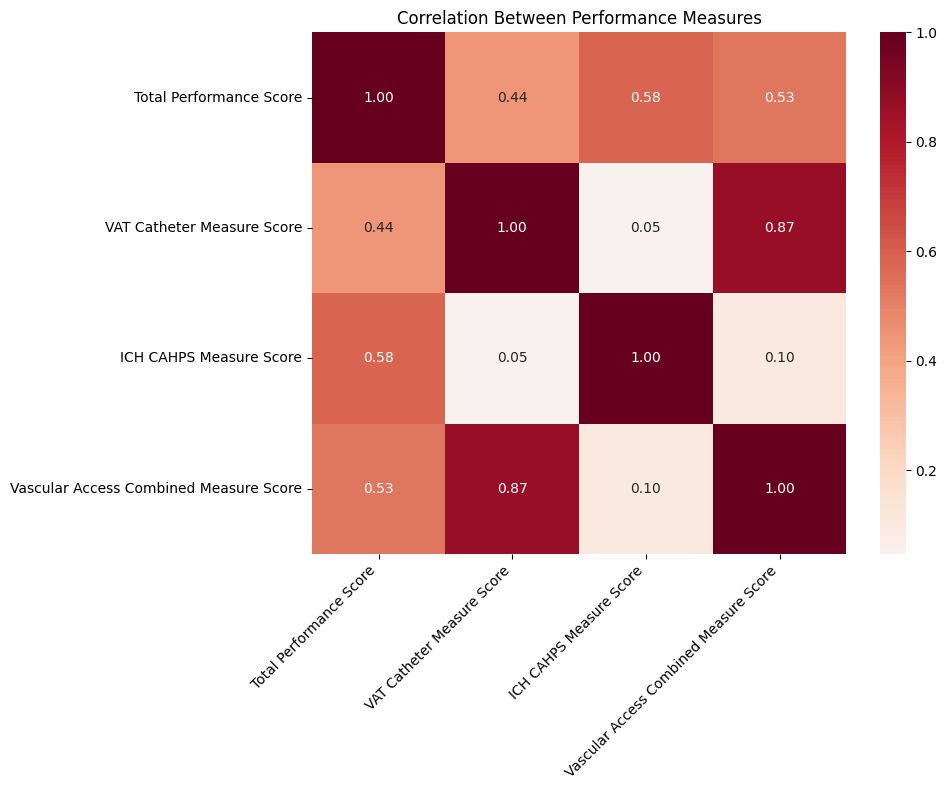

"\ndf_corr.corr(): Calculate correlation coefficient\nannot=True: Show the value (Without typing this, it will show colors only)\ncmap='RdBu_r': Setting the colormap: Red(+1) and Blue(-1) (What is _r?)\ncenter=0: centered by 0 to separate the colors match the value\n"

In [86]:
# Make heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
   df_corr.corr(),
   annot=True,
   cmap='RdBu_r',
   center=0,
   fmt='.2f'
)
plt.title('Correlation Between Performance Measures')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

'''
df_corr.corr(): Calculate correlation coefficient
annot=True: Show the value (Without typing this, it will show colors only)
cmap='RdBu_r': Setting the colormap: Red(+1) and Blue(-1) (What is _r?)
center=0: centered by 0 to separate the colors match the value
'''